# Visualising sample collections over time

### Introduction

This notebook will recreate Supplementary Figure 2 of the [Pf7 Paper](https://wellcomeopenresearch.org/articles/8-22/v1). This figure shows the distribution of *Plasmodium falciparum* samples, based on when they were collected. The figure highlights the additional data collected for the latest release (Pf7), in relation to those collected for previous work (Pf6).

**This notebook should take less than 5 minutes to run.**

## Setup

First, we need to ensure we have the packages installed which are needed to run the analysis. The code below installs the MalariaGEN data package, which is used to access the Pf7 data via the cloud.

In [ ]:
# Install package
!pip install -q --no-warn-conflicts malariagen_data

Load the required Python libraries:

In [ ]:
# Import previously installed packages
import malariagen_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

## Data Access

First load the Pf7 metadata, then output the top of the dataframe to check it is what we are expecting:


In [ ]:
# Load Pf7 data
release_data = malariagen_data.Pf7()
sample_metadata = release_data.sample_metadata()

# View the first few lines of the metadata
sample_metadata.head()

# Basic summaries of data
It is often useful to summarise the data by different variables. This gives a get a better sense of how the data is distributed, and is generally a good sense check to make sure the numbers are what we are expecting. Below are some simple summaries of the samples for three meta-variables included in the dataset:

1) Population
2) Year
3) Study

In [ ]:
# Estimate the counts of samples from each population
sample_metadata['Population'].value_counts(dropna=False)

In [ ]:
# Then we calculate the mean number of samples per year of the study, there was an average of ~2013 samples collected per year
pd.to_numeric(sample_metadata['Year'], errors='coerce').describe()

In [ ]:
# Then we calculate the number of samples, based on whether they were included in the Pf6 release.
# Here 'False' means these samples were made available as part of the new Pf7 dataset (a total of 13,752).
sample_metadata['Sample was in Pf6'].value_counts(dropna=False)

## Plotting sample collection date over time

The next step is to visualise when the samples were collected over time.

Here, we generate the Supplementary figure 2 from the Pf7 manuscript. This histogram shows when the samples were collected, separated into those included in the Pf7 data release, versus those included in the previous release (Pf6). In this plot, the x axis shows the year of sample collection, while the Y axis shows the count of samples collected. The blue line shows the samples which were included in the Pf6 dataset, while the red line shows the new samples included in the Pf7 release. The figure was generated using the matplotlib Python package, a introduction to which can be found here: https://matplotlib.org/stable/tutorials/pyplot.html.

As shown on the plot, there were many new samples included in the Pf7 release (13,752), which were collected mostly between 2014-2018.

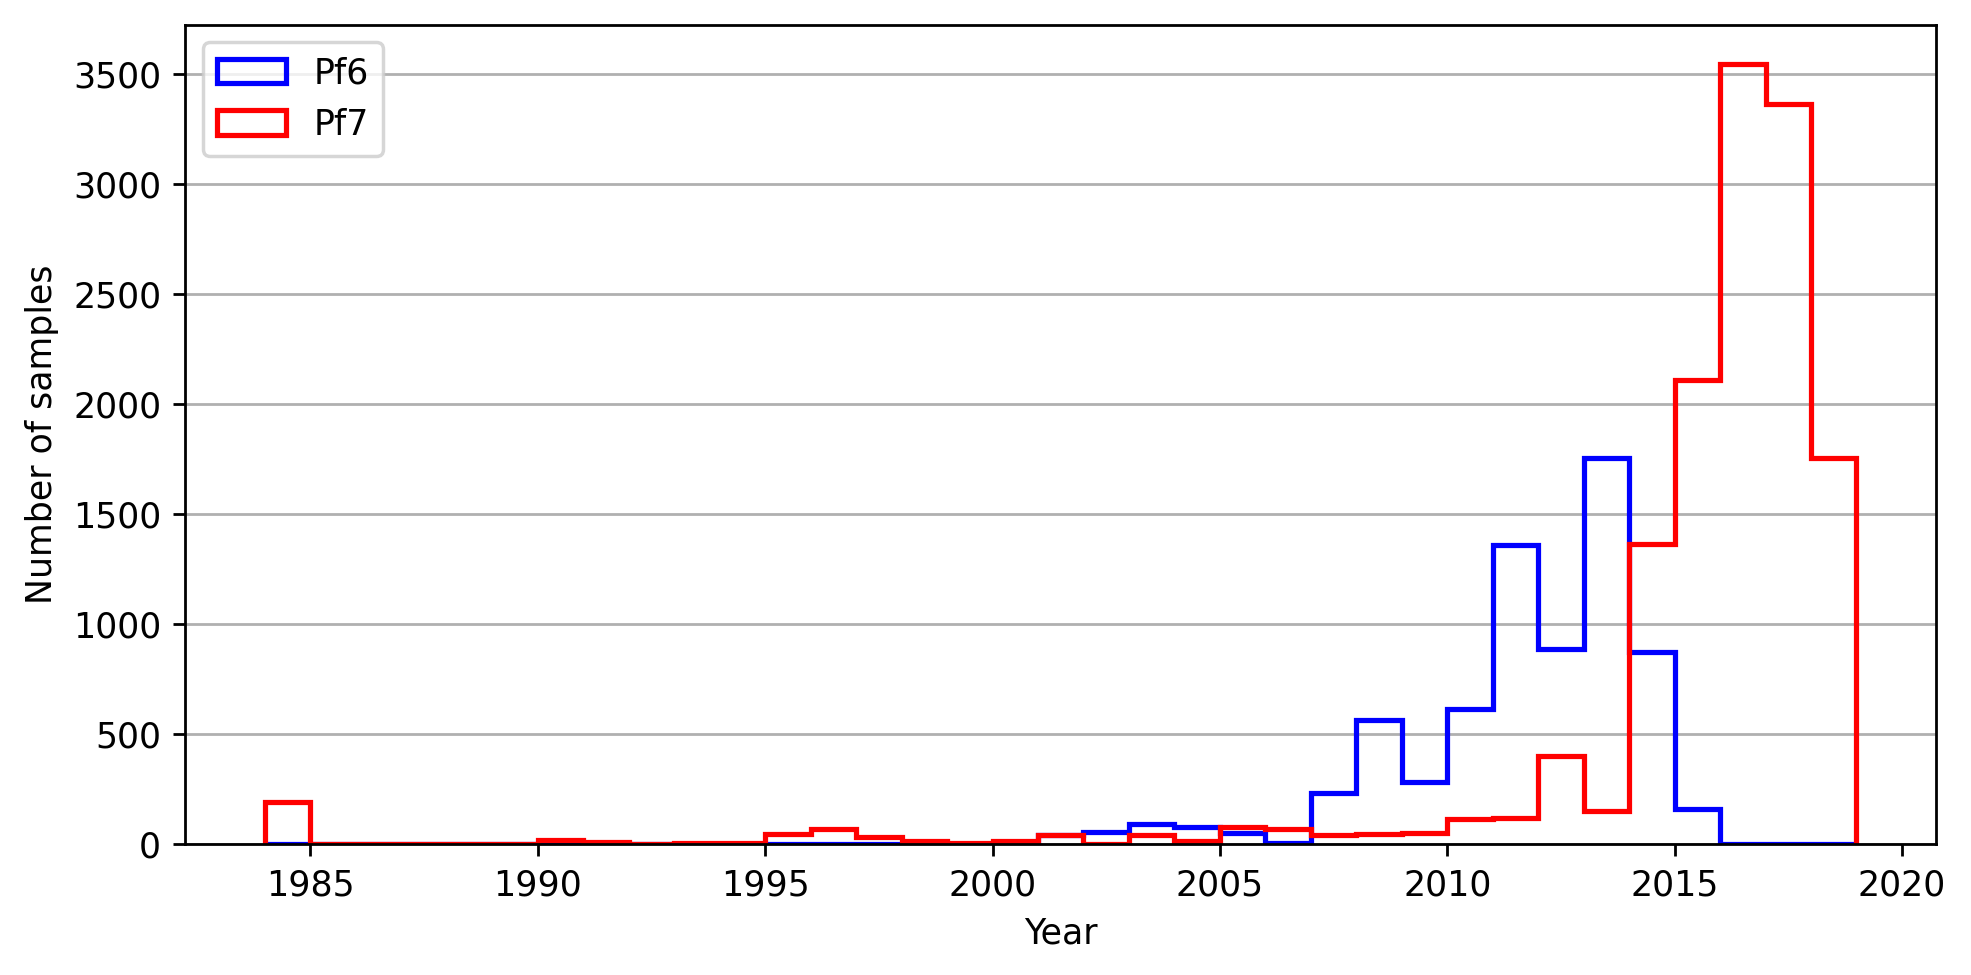

In [ ]:
# Set the min and max year to determine the range of years to include in the plot
min_year = pd.to_numeric(sample_metadata['Year'], errors='coerce').min()
max_year = pd.to_numeric(sample_metadata['Year'], errors='coerce').max()

# Set the size of the desired plot
plt.rcParams["figure.dpi"] = 250

# Here we generate two histograms - one for each group Pf6/Pf7
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hist(
    pd.to_numeric(sample_metadata.loc[sample_metadata['Sample was in Pf6'], 'Year'], errors='coerce'),
    bins=np.arange(min_year, max_year+2),
    ec='blue', fc='none', lw=1.5, histtype='step', label='Pf6'
)
ax.hist(
    pd.to_numeric(sample_metadata.loc[~sample_metadata['Sample was in Pf6'], 'Year'], errors='coerce'),
    bins=np.arange(min_year, max_year+2),
    ec='red', fc='none', lw=1.5, histtype='step', label='Pf7'
)

# Include reference lines for the y axis only
ax.grid(True, axis='y')

# set axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of samples')

# set axis legend
ax.legend(loc='upper left')

# Lastly, we would like to minimise padding around the subplots
fig.tight_layout()


### Save the figure:


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save samples over time plot
# This will send the file to your Google Drive, where you can download it from if needed
# Change the file path if you wish to send the file to a specific location
# Change the file name if you wish to call it something else
file_path = '/content/drive/My Drive/'
file_name = 'Pf7_sample_collections_over_time'

# We save as both .png and .PDF files
fig.savefig(f'{file_path}{file_name}.png', dpi=250)
fig.savefig(f'{file_path}{file_name}.pdf')

## Conclusions

In summary, in this notebook, we accessed the MalariaGEN data available on the cloud for the latest *Plasmodium falciparum* data release (Pf7). After doing some basic summaries of the data, we created histograms of the samples per year, broken down by whether or not the sample was in Pf6 compared to Pf7 (as in Supplementary information for https://doi.org/10.12688/wellcomeopenres.18681.1).